In [1]:
#import librarise
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [2]:
#download data
#famous Davis dataset

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv', index_col=False)
df.head()

,rownames,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [3]:
unnesessay_columns = ['rownames', 'repwt', 'repht']
df.drop(unnesessay_columns, axis=1, inplace=True)
df.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


In [ ]:
df.isnull().sum()
#no missing values

sex       0
weight    0
height    0
dtype: int64

Conduct cross validation, eventhough there are only 200 rows.

In [26]:
X = df.drop('weight', axis=1)
y = df['weight']
object_cols = X.select_dtypes(include=['object']).columns

In [27]:
object_cols

Index(['sex'], dtype='object')

In [39]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)

In [50]:
OH_X_train.rename(columns={'1': 'men'}, inplace=True)
OH_X_train.drop('0', axis=1, inplace=True)
OH_X_train.head()

,height,men
0,182,1.0
1,161,0.0
2,161,0.0
3,177,1.0
4,157,0.0


In [51]:
y = pd.DataFrame(y)
y.head()

,weight
0,77
1,58
2,53
3,68
4,59


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [52]:
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

In [54]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, OH_X_train, y,
                              cv=20,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

/Users/kakamuhayata/Desktop/predictionmodel/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/kakamuhayata/Desktop/predictionmodel/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/kakamuhayata/Desktop/predictionmodel/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/kakamuhayata/Desktop/predictionmodel/.venv/lib/python3.12/site-packages/sklearn/b

MAE scores:
 [ 8.38813357 17.03648283 12.68334233  9.26676558  8.14029911  8.73804679
  7.06024657  6.62793582  6.79389747  7.05691779  5.37679735  7.12310558
  5.27153948  5.27897535  4.25798607  6.12219362  4.71605817  5.66716149
  3.51005209  7.4418101 ]


/Users/kakamuhayata/Desktop/predictionmodel/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/kakamuhayata/Desktop/predictionmodel/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [55]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
7.32788735871155


In [58]:
my_pipeline.fit(OH_X_train, y)

/Users/kakamuhayata/Desktop/predictionmodel/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor', SimpleImputer()),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=0))])

In [59]:
import joblib

# Save the model
joblib.dump(my_pipeline, 'model.pkl')


['model.pkl']

/Users/kakamuhayata/Desktop/predictionmodel/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/kakamuhayata/Desktop/predictionmodel/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/kakamuhayata/Desktop/predictionmodel/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/kakamuhayata/Desktop/predictionmodel/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/kakamuhayata/Desktop/predictionmodel/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid featu

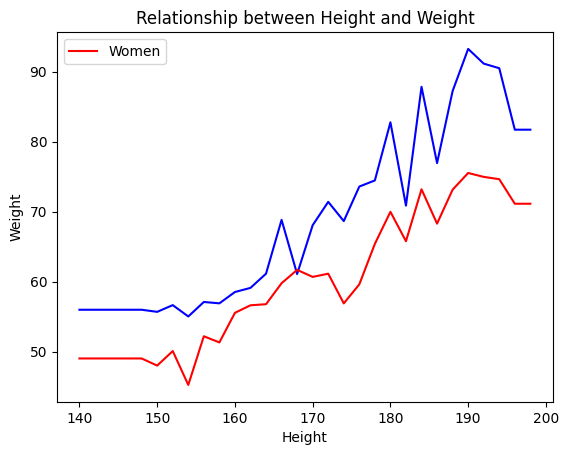

In [20]:
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Load the model
model = joblib.load('model.pkl')

# make two list of data
men_weight = []
women_weight = []

# Use the trained model to make predictions
for i in range(140, 200, 2):
    men_weight.append(model.predict([[i, 1]]))
    women_weight.append(model.predict([[i, 0]]))

# Generate 30 evenly spaced points for the x-axis
x_axis = [140 + 2*i for i in range(30)]

# Plot the data for men
plt.plot(x_axis, men_weight, 'b-')

# Plot the data for women
plt.plot(x_axis, women_weight, 'r-', label='Women')

# Set the labels and title
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Relationship between Height and Weight')

# Add a legend
plt.legend()

# Show the plot
plt.show()